StreetContinuity (SC)
========

StreetContinuity (SC) is a python library that implements both Intersection Continuity Negotiation (ICN) and Hierarchical Intersection Continuity Negotiation (HICN). ICN was first proposed by Porta et al. (2006) and further enhanced by Masucci et al. (2014), who advanced with the HICN approach.

For details about each implementation, please refer to:

* Sergio Porta, Paolo Crucitti, Vito Latora, **The network analysis of urban streets: A dual approach**, Physica A: Statistical Mechanics and its Applications, Volume 369, Issue 2, 2006, Pages 853-866, ISSN 0378-4371.

* Masucci, A. P., Stanilov, K., Batty, M. (2014). **Exploring the evolution of London's street network in the information space: A dual approach.** Physical Review E, 89(1), 012805.

Acknowledgement
--------------

I want to thank Elisabeth H. Krueger and Xianyuan Zhan, who provide me with their version of the HICN.
Their code gave some insights and helped in the process of validation of the results.

For details about their implementation, please refer to:

* Krueger, E., Klinkhamer, C., Urich, C., Zhan, X., & Rao, P. S. C. (2017). **Generic patterns in the evolution of urban water networks: Evidence from a large Asian city**. Physical Review E, 95(3), 032312.
___


In [1]:
import ast

In [2]:
from street_continuity.all import *

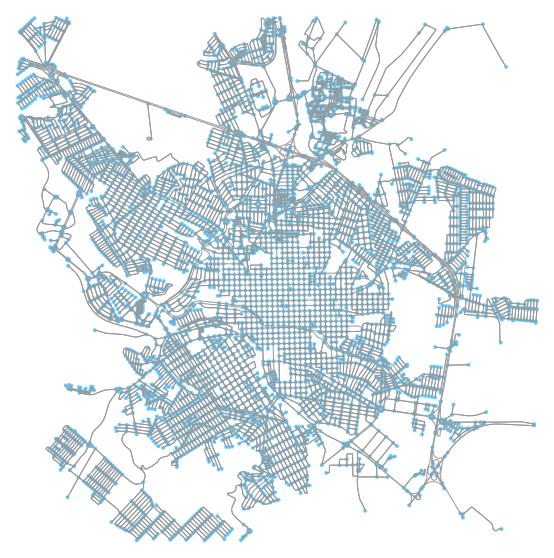

In [3]:
oxg = ox.graph_from_point((-22.012282, -47.890821), distance=5000)
fig = ox.plot_graph(oxg, fig_height=10) # visualizing results

In [4]:
p_graph = from_osmnx(oxg=oxg, use_label=True) # use_label = True: uses HICN algorithm
d_graph = dual_mapper(primal_graph=p_graph, min_angle=120)

/home/gabrielspadon/.local/lib/python3.6/site-packages/street_continuity/util.py:49: RuntimeWarning: invalid value encountered in double_scalars
  cos_law = min(max(-1.0, (((d_sn ** 2.0) + (d_nt ** 2.0) - (d_st ** 2.0)) / (2.0 * d_sn * d_nt))), 1.0)


In [5]:
dxg = write_graphml(graph=d_graph, filename='file.graphml', directory='../data')
write_supplementary(graph=d_graph, filename='supplementary.txt', directory='../data')

In [6]:
path_dict = {}
for did, primal_nodes in dxg.nodes(data='edges'):
    primal_nodes = ast.literal_eval(primal_nodes)
    path_dict[did] = primal_nodes

In [14]:
eid = 0
edge_colors = {}
for _, edges in path_dict.items():
    for (s, t) in edges:
        if oxg.has_edge(s, t):
            edge_colors[(s, t)] = eid
        elif oxg.has_edge(t, s):
            edge_colors[(t, s)] = eid
        else:
            print('Err!')
    eid += 1

In [45]:
ec = np.array(ec) / (max(ec) - 1)

In [49]:
max(ec)

1.0001853224610824

In [59]:
ev = [edge_colors.get((u, v), -1) for u, v, key in oxg.edges(keys=True)]

In [60]:
import matplotlib.cm as cm
import matplotlib.colors as colors

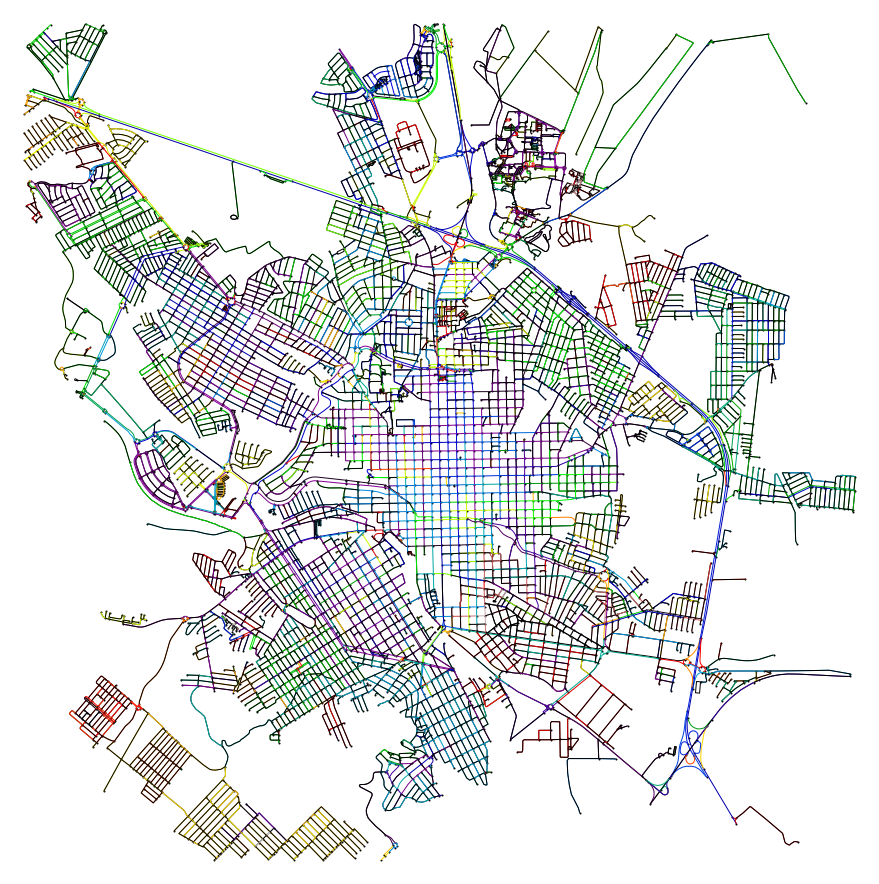

In [64]:
# highlight all parallel edges in purple

# color scale converted to list of colors for graph edges
norm = colors.Normalize(vmin=min(ev)*0.8, vmax=max(ev))
cmap = cm.ScalarMappable(norm=norm, cmap=cm.nipy_spectral)
ec = [cmap.to_rgba(cl) for cl in ev]

# ec = ['#FF0A0A' if edge_colors.get((u, v), -1) == -1 else 'purple' for u, v, key in oxg.edges(keys=True)]
fig, ax = ox.plot_graph(oxg, node_color='w', node_edgecolor='k', node_size=1, 
                        node_zorder=1, edge_color=ec, edge_linewidth=1, fig_height=16)

---

In [ ]:
p_graph = from_osmnx(oxg=oxg, use_label=False) # use_label = False: uses ICN algorithm
d_graph = dual_mapper(primal_graph=p_graph, min_angle=120)